<a href="https://colab.research.google.com/github/janhavidusad21/Data-science-Assigment/blob/main/Decision_Tree_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing


In [2]:
df=pd.read_csv("/content/heart_disease.csv")

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,fixed defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,fixed defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,fixed defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,normal,4


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [6]:
df["oldpeak"]=df["oldpeak"].fillna(df["oldpeak"].mean())

In [7]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.300000,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.000000,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.400000,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.000000,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.500000,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.500000,upsloping,fixed defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.000000,flat,fixed defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.500000,downsloping,fixed defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,0.891253,downsloping,normal,4


In [8]:
df["thal"].value_counts()

,count
thal,
reversable defect,363
normal,328
fixed defect,217


In [9]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [10]:
# Example: let’s say your target column is 'target'
y = df['thal']  # Replace with your actual target column name
X = df.drop('thal', axis=1)

# Encode categorical columns if needed
# For example, using get_dummies
X = pd.get_dummies(X, drop_first=True)
label_encoder=preprocessing.LabelEncoder()
y=label_encoder.fit_transform(y)
Y=pd.DataFrame(y)



In [11]:
Y

,0
0,0
1,0
2,0
3,0
4,0
...,...
903,0
904,0
905,0
906,1


In [12]:
X

,age,trestbps,chol,fbs,thalch,oldpeak,num,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,exang_TRUE,exang_TURE,slope_flat,slope_upsloping
0,63,145,233,True,150,2.300000,0,True,False,False,True,False,False,False,False,False,False
1,41,135,203,False,132,0.000000,0,True,True,False,False,True,False,False,False,True,False
2,57,140,192,False,148,0.400000,0,True,False,False,False,True,False,False,False,True,False
3,52,118,186,False,190,0.000000,0,True,False,False,True,False,False,False,False,True,False
4,57,110,201,False,126,1.500000,0,True,False,False,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,125,0,False,120,1.500000,4,True,False,False,False,True,False,False,False,False,True
904,62,166,170,False,120,3.000000,4,True,False,False,False,False,True,True,False,True,False
905,56,170,0,False,123,2.500000,4,True,False,True,False,False,False,True,False,False,False
906,56,144,208,True,105,0.891253,4,True,False,True,False,False,True,False,True,False,False


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [14]:
X_train

,age,trestbps,chol,fbs,thalch,oldpeak,num,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,exang_TRUE,exang_TURE,slope_flat,slope_upsloping
84,42,120,295,False,162,0.000000,0,True,True,False,False,True,False,False,False,False,True
10,30,170,237,False,170,0.000000,0,False,False,False,True,False,True,False,False,False,False
617,74,140,237,True,94,0.000000,1,True,False,True,False,True,False,False,False,False,True
250,41,104,0,False,111,0.000000,0,True,False,False,False,False,True,False,False,True,False
869,49,137,142,False,68,0.891253,3,True,False,True,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,63,135,252,False,172,0.000000,0,False,False,True,False,False,False,False,False,False,True
270,37,120,260,False,130,0.000000,0,False,True,False,False,True,False,False,False,False,False
860,48,140,374,False,159,1.500000,3,True,False,False,False,True,False,True,False,False,True
435,57,154,232,False,164,0.000000,1,True,True,False,False,False,False,False,False,False,True


In [15]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [26]:
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

In [27]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    cv=5,              # 5-fold cross-validation
    scoring='accuracy', # or another metric
    n_jobs=-1          # use all cores
)


In [28]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [29]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}


In [30]:
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Test set accuracy:", accuracy)

Test set accuracy: 0.43956043956043955


In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [32]:
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

In [35]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


if len(set(y_test)) == 2:
    auc = roc_auc_score(y_test, y_proba)
    print("ROC-AUC Score:", auc)





Accuracy: 0.43956043956043955
Precision: 0.3194316860486756
Recall: 0.43956043956043955
F1 Score: 0.36227574206668284

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        52
           1       0.48      0.47      0.47        62
           2       0.42      0.75      0.54        68

    accuracy                           0.44       182
   macro avg       0.30      0.41      0.34       182
weighted avg       0.32      0.44      0.36       182

Confusion Matrix:
 [[ 0 15 37]
 [ 0 29 33]
 [ 0 17 51]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [44]:
fn=["age","trestbps","thalch","oldpeak","num","sex_Male","cp_atypical angina","cp_non-anginal","cp_typical angina","restecg_normal","restecg_st-t abnormality","exang_TRUE","exang_TURE","slope_flat","slope_upsloping"]
cn=["fixed defect","normal","reversable defect"]

[Text(0.5, 0.875, 'num <= 156.5\nentropy = 1.544\nsamples = 726\nvalue = [165, 266, 295]\nclass = reversable defect'),
 Text(0.25, 0.625, 'cp_non-anginal <= 0.5\nentropy = 1.537\nsamples = 543\nvalue = [140, 155, 248]\nclass = reversable defect'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'age <= 54.5\nentropy = 1.451\nsamples = 88\nvalue = [14.0, 44.0, 30.0]\nclass = normal'),
 Text(0.0625, 0.125, 'entropy = 1.58\nsamples = 43\nvalue = [13.0, 16.0, 14.0]\nclass = normal'),
 Text(0.1875, 0.125, 'entropy = 1.078\nsamples = 45\nvalue = [1, 28, 16]\nclass = normal'),
 Text(0.375, 0.375, 'trestbps <= 145.5\nentropy = 1.518\nsamples = 455\nvalue = [126, 111, 218]\nclass = reversable defect'),
 Text(0.3125, 0.125, 'entropy = 1.543\nsamples = 344\nvalue = [107, 85, 152]\nclass = reversable defect'),
 Text(0.4375, 0.125, 'entropy = 1.372\nsamples = 111\nvalue = [19, 26, 66]\nclass = reversable defect'),
 Text(0.75, 0.625, 'cp_atypical angina <= 0.5\nentropy = 1.334\nsamples = 183\nvalu

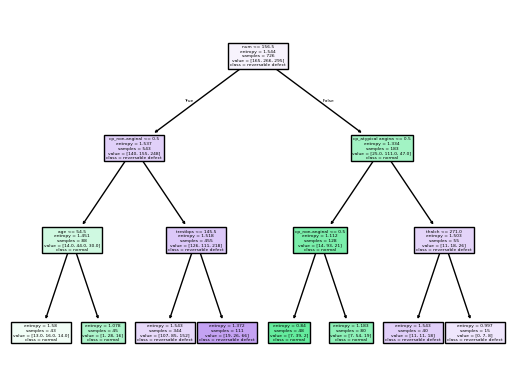

In [45]:
from sklearn import tree
tree.plot_tree(best_model,
               feature_names=fn,
               class_names=cn,
               filled=True)

In [43]:
importances = best_model.feature_importances_
importances


array([0.10224252, 0.06901971, 0.05438662, 0.        , 0.38817034,
       0.        , 0.17314125, 0.21303956, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])